In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x = [-3,-2,-1,0,1,2,3]
A = []
for i in x:
    for j in x:
        for k in x:
            A.append([i,j,k])

In [4]:
L = 1. # box size
N = 1000 # number of points
Nb = 25 # number of bins in distance
C = [.5,.5,.5]
rho=[]
rmin = 0.5
rmax = 3.

r = np.linspace(rmin, rmax, Nb+1)[1:Nb+1]
rho_med = float(N) / (float(L)**3)

In [5]:
rho = np.zeros(Nb)
data  = np.random.rand(N,3)

In [246]:
for i in range(N):
    P = data[i]
    for s in A:
        Ps = P + [L*s[0], L*s[1], L*s[2]]
        d = np.linalg.norm(C-Ps)
        if d<=rmax:
            l = int(np.floor( (d-rmin)/(rmax-rmin) * Nb))
            rho[l]+=1.

In [247]:
vol = []
V0 = 4./3.* np.pi * rmin**3
for s in r:
    vol.append(4./3. * np.pi * s**3. - V0)

dens = np.zeros(Nb)
for i in range(Nb):
    dens[i] = (sum(rho[0:i])+rho[i]) / vol[i]
dens = dens / rho_med - 1.

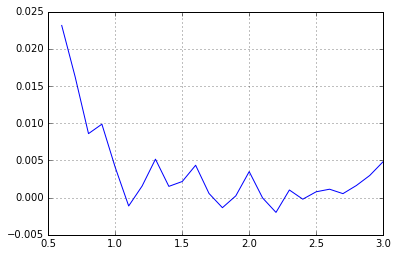

In [248]:
plt.plot(r, dens)
plt.grid()
plt.show()

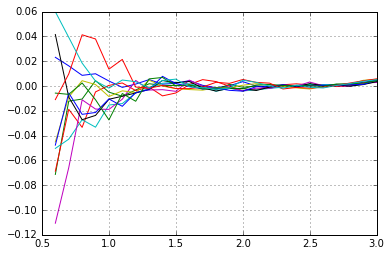

In [249]:
plt.plot(r, dens)
plt.grid()

for _ in range(10):
    rho = np.zeros(Nb)
    dens = np.zeros(Nb)
    data  = np.random.rand(N,3)

    for i in range(N):
        P = data[i]
        for s in A:
            Ps = P + [L*s[0], L*s[1], L*s[2]]
            d = np.linalg.norm(C-Ps)
            if d<=rmax:
                l = int(np.floor( (d-rmin)/(rmax-rmin) * Nb))
                rho[l]+=1.

    for i in range(Nb):
        dens[i] = (sum(rho[0:i])+rho[i]) / vol[i]

    dens = dens / rho_med - 1.
    
    plt.plot(r, dens)
    
plt.show()